In [1]:
import sys
sys.path.append('/afs/ee.cooper.edu/user/t/a/tam8/documents/ml_misc/semi_supervised/')
import coreg
reload(coreg)
import trireg
reload(trireg)
sys.path.append('/afs/ee.cooper.edu/user/t/a/tam8/documents/ml_misc/ordinal/')
import simple
reload(simple)
sys.path.append('/afs/ee.cooper.edu/user/t/a/tam8/documents/ml_misc/ensemble/')
import stacking
reload(stacking)



import pandas as pd
import numpy as np
from sklearn import preprocessing
import xgboost as xgb

import transformers as tforms
reload(tforms)
from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion, make_union

import metrics
reload(metrics)
from sklearn.cross_validation import StratifiedKFold, train_test_split

from sklearn.base import clone

from sklearn.svm import SVC, LinearSVC, SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, ElasticNet, Ridge, Lasso, SGDRegressor
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier, ExtraTreesRegressor, RandomForestRegressor, RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.isotonic import IsotonicRegression

from sklearn.preprocessing import StandardScaler

from collections import Counter
import minirank as mr

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from time import time

def wgmean(x, w):
    return np.exp(np.sum(w*np.log(x), axis=1) / np.sum(w, axis=1))

In [2]:
# Load Data
import cPickle as pickle
train_pd  = pd.read_pickle('saved/train_pd_enc.p')
test_pd  = pd.read_pickle('saved/test_pd_enc.p')
labels = pd.read_pickle('saved/labels.p')
test_ind = pickle.load(open('saved/test_ind.p'))
y_binned = np.load('saved/y_binned.npy')

fi = np.load('saved/feature_importances.npy')
y_binned[y_binned==6] = 5

drop_cols = train_pd.columns[fi < 0.01]


for col in drop_cols:
    train_pd.drop(col, axis=1, inplace=True)
    test_pd.drop(col, axis=1, inplace=True)


In [4]:
train = np.array(train_pd)
test = np.array(test_pd)

X_train = train.astype(float)
X_test = test.astype(float)
y_train = np.array(labels)

holdout = False
if holdout:
    X_train, X_hold, \
    y_train, y_hold, \
    y_binned, y_binned_hold \
    = train_test_split(
        X_train, y_train, y_binned, 
        test_size=0.2, random_state=0)


pipe_x = make_pipeline(
    make_union(
        tforms.IdentityTformer(),
#         make_pipeline(AddTformer(1), BoxCoxTformer()),
#         AnscombeTformer(),
    ),
#     StandardScaler(),
)
pipe_y = make_pipeline(
#     tforms.IdentityTformer(),
#     tforms.BoxCoxTformer(),
#     tforms.LogTfortforms.mer(),
#     tforms.AnscombeTformer(),
#     tforms.FreemanTukeyTformer(),
#     tforms.ArcsinhTformer(),
    StandardScaler(),
    
)
pipe_x.fit(np.r_[X_train, X_test])


X_train = pipe_x.transform(X_train)
X_test = pipe_x.transform(X_test)
try:
    X_hold = pipe_x.transform(X_hold)
except:
    pass
# y_train = pipe_y.fit_transform(y_train)

# small_n = 5000
# X_train = X_train[:small_n,:]
# y_train = y_train[:small_n]
# y_binned = y_binned[:small_n]

print 'y_train', y_train.shape
print 'X_train', X_train.shape
print 'X_test', X_test.shape
try:
    print 'X_hold', X_hold.shape
except:
    pass
print len(np.unique(y_train))
print len(np.unique(y_binned))

 y_train (50999,)
X_train (50999, 26)
X_test (51000, 26)
X_hold 50
5


In [ ]:
import bhtsne

tsne2 = bhtsne.bh_tsne(StandardScaler().fit_transform(
        np.r_[X_train, X_test]
    ), no_dims=2)

X_tsne2 = np.array([result for result in tsne2])

# tsne3 = bhtsne.bh_tsne(X_all, no_dims=3)
# X_tsne3 = np.array([result for result in tsne3])

In [46]:
X_tsne2 = np.load('saved/X_tsne2.npy')

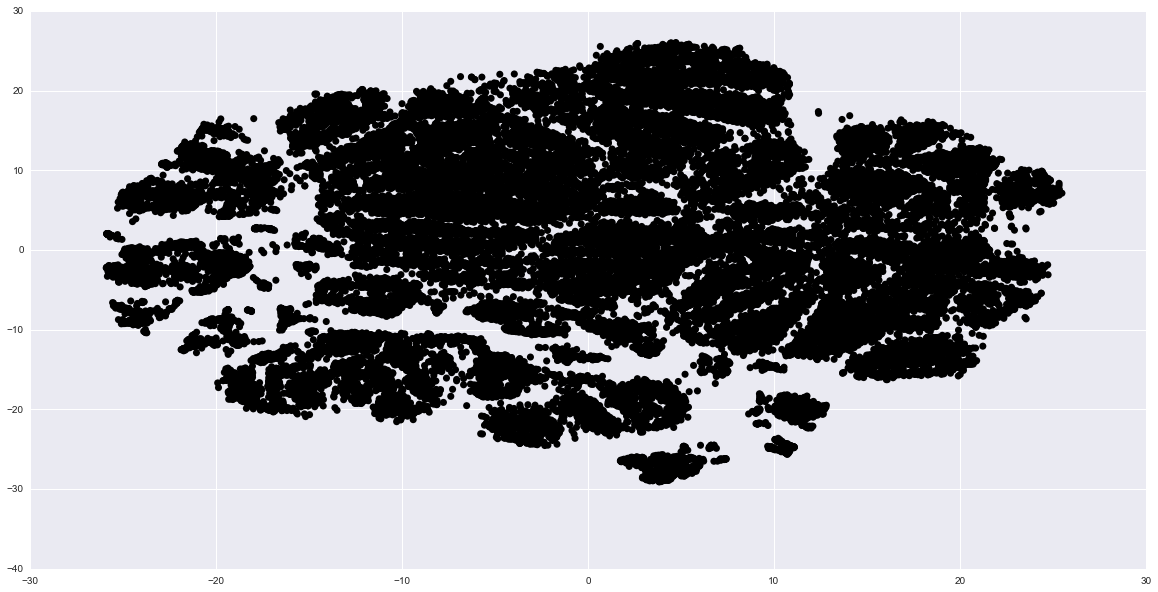

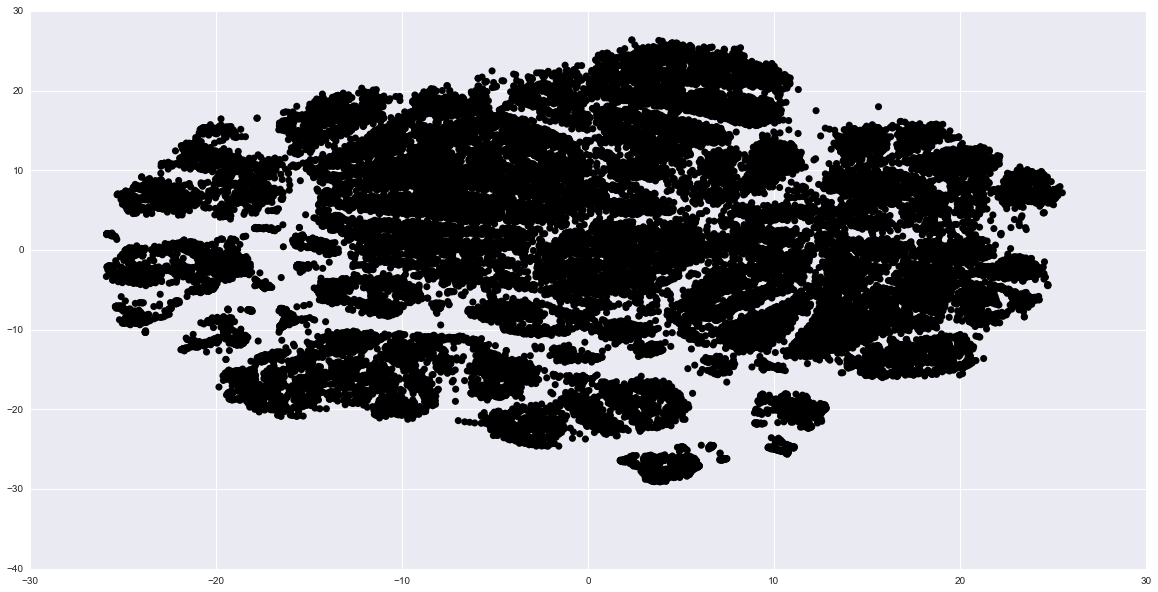

In [47]:
plt.figure(figsize=(20,10))

plt.scatter(X_tsne2[:len(X_train),0], 
            X_tsne2[:len(X_train),1], 
            c=np.ones(len(y_train)),
            s=50, lw=0, alpha=1, cmap='cubehelix')

plt.figure(figsize=(20,10))

plt.scatter(X_tsne2[-len(X_test):,0], 
            X_tsne2[-len(X_test):,1], 
            c=np.zeros(len(X_test)),
            s=50, lw=0, alpha=1, cmap='cubehelix')

In [54]:
plt.figure(figsize=(20,10))

plt.scatter(X_train[:,42], 
            X_train[:,47], 
            c=np.ones(len(y_train)),
            s=50, lw=0, alpha=1, cmap='cubehelix')

plt.figure(figsize=(20,10))

plt.scatter(X_test[:,42], 
            X_test[:,47], 
            c=np.zeros(len(X_test)),
            s=50, lw=0, alpha=1, cmap='cubehelix')

IndexError: index 42 is out of bounds for axis 1 with size 26